<a href="https://colab.research.google.com/github/souken-b/a_r_practice/blob/master/calc_flowrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(q: 'flow_rate', n_diam: 'nozzle diameter', temp, p_up, p_down, n_ratio: 'nozzle ratio', h_ratio: 'specific heat ratio', flow_flg: 'flow direction flg') -> 'f(q)=aq^3+bq^2+q+d':
  # air viscosity rate(Pa・s)
  a_v_rate = 18.2 * 1e-6
  # air temparature(K)
  a_temp = 273 + 25
  # sutherland constant
  c_suther = 117
  # viscosity rate
  v_rate = a_v_rate * ((a_temp + c_suther) / (temp + c_suther)) * (temp / a_temp)**(3/2)
  # upstream density
  if (flow_flg):
    dens_up = (p_up * (28.93/1000)) / (8.3144 * temp)
  else:
    dens_up = 1.225
  c_lambda = (4/(pi*n_diam))*(dens_up/v_rate)
  # 膨張補正係数
  exp_coef = 1-(0.41 + 0.35 * (n_ratio**2))*((p_up - p_down)/(h_ratio * p_up))
  H = (exp_coef ** 2) * ((pi*((n_diam / 2)**2)) ** 2) * 2 * (p_up - p_down) / dens_up
  # 実験値
  if (flow_flg):
    # forward flow
    A_0 = 0.601
    B = 22.7
    C = 815
    D = 1401
  else:
    # backward flow
    A_0 = 0.626
    B = 26.2
    C = 1733
    D = 2794
  
  coef_a = c_lambda ** 2
  coef_b = c_lambda * (B + C)
  coef_c = B * C - (c_lambda ** 2) * (A_0 ** 2) *  H
  coef_d = -(c_lambda * (A_0 ** 2) * D * H)
  return (coef_a * q ** 3 + coef_b * q ** 2 + coef_c * q +coef_d)



In [ ]:
def newton_raphson(f, q1):
  fq = diff(f, q)
  threshold = 1e-6
  res = threshold + 1

  while res > threshold:
    q2 = float(q1 - (f.subs(q, q1) / fq.subs(q, q1)))
    res = np.abs(q2 - q1)
    q1 = q2
  return q2


In [ ]:
q = Symbol('q')
n_diam = 0.0081235
temp = 273 + 25
p_down = 101325 
n_ratio = 0.1022
h_ratio = 1.4

In [ ]:
t_forward = np.linspace(0, np.pi, 500)
sin_list = np.sin(t_forward)
p1_list_in = [(1000*i + 101325 ) for i in sin_list]
q1_list_forward = []

In [ ]:
for p1 in p1_list_in:
  q1 = newton_raphson(f(q, n_diam, temp, p1, p_down, n_ratio, h_ratio, True), q1=0.0009)
  q1_list_forward.append(q1)

1.0
0.9999816424874781
0.999963287983422
0.9999449372145116
0.9999265909070076
0.9999082497867235
0.9998899145789971
0.9998715860086619
0.9998532648000187
0.9998349516768075
0.9998166473621792
0.9997983525786678
0.9997800680481614
0.9997617944918754
0.9997435326303236
0.9997252831832906
0.9997070468698042
0.9996888244081076
0.9996706165156314
0.9996524239089665
0.9996342473038362
0.9996160874150691
0.9995979449565714
0.9995798206412997
0.9995617151812339
0.9995436292873503
0.9995255636695939
0.9995075190368519
0.9994894960969268
0.9994714955565098
0.999453518121153
0.9994355644952445
0.9994176353819801
0.9993997314833383
0.9993818535000526
0.9993640021315865
0.9993461780761062
0.9993283820304552
0.9993106146901276
0.9992928767492433
0.9992751689005208
0.9992574918352523
0.9992398462432777
0.9992222328129592
0.999204652231156
0.9991871051831983
0.9991695923528626
0.9991521144223463
0.9991346720722426
0.9991172659815155
0.999099896827475
0.9990825652857523
0.9990652720302747
0.9990480177

In [ ]:
q1_list_cc_forward = [(i * 1e6) for i in q1_list_forward]

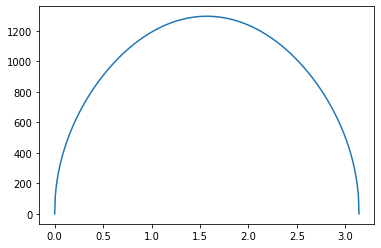

In [ ]:
plt.plot(t_forward, q1_list_cc_forward)

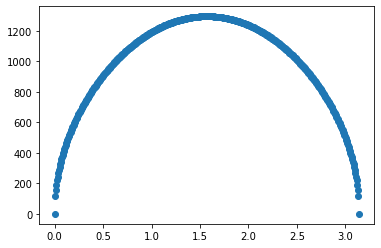

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(t_forward, q1_list_cc_forward)
fig.show()

In [ ]:
q = Symbol('q')
n_diam = 0.0081235
temp = 273 + 20
p_up = 101325 
n_ratio = 0.1022
h_ratio = 1.4

In [ ]:
t_back = np.linspace(np.pi, 2*np.pi, 500)
sin_list = np.sin(t_back)
p2_list_out = [(1000*i + 101325 ) for i in sin_list]
q1_list_back = []

In [ ]:
for p2 in p2_list_out:
  q1_out = newton_raphson(f(q, n_diam, temp, p_up, p2, n_ratio, h_ratio, False), q1=0.0009)
  q1_list_back.append(q1_out)

In [ ]:
q1_list_cc_back = [-(i * 1e6) for i in q1_list_back]


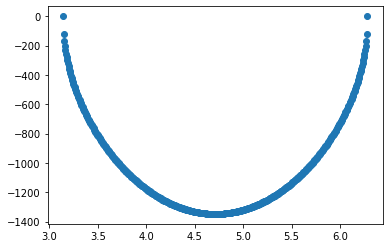

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(t_back, q1_list_cc_back)
fig.show()

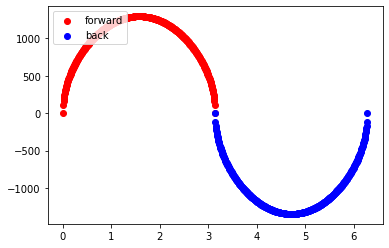

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(t_forward, q1_list_cc_forward, c='red', label='forward')
ax.scatter(t_back, q1_list_cc_back, c='blue', label='back')
ax.legend(loc='upper left')
fig.show()